In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df=pd.read_excel(r'C:\Users\Sudheerkumar Peesa\Machine Learning Projects\Admission_Predict Data\cleaned_data_Admission.xlsx')
df

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...,...
495,495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,498,499,312,103,4,4.0,5.0,8.43,0,0.73


# Data Wrangling

for this data set,no encoding required

In [108]:
x=df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']]
y=df['Chance of Admit ']

# Train-Test Split

In [109]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=25)

# Step-4:Modelling

In [110]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
461,301,102,3,2.5,2.0,8.13,1
79,294,93,1,1.5,2.0,7.36,0
187,335,118,5,4.5,3.5,9.44,1
265,313,102,3,2.5,2.5,8.68,0
251,316,99,2,2.5,3.0,9.00,0
...,...,...,...,...,...,...,...
317,300,99,1,1.0,2.5,8.01,0
143,340,120,4,4.5,4.0,9.92,1
474,308,105,4,3.0,2.5,7.95,1
318,324,111,3,2.5,2.0,8.80,1


In [111]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
print("coefficient",model.coef_)
print("intercept",model.intercept_)

coefficient [ 0.00027394  0.0043784   0.02893561 -0.01544257  0.02125989  0.11072558
  0.0319595 ]
intercept -0.912528594283898


In [112]:
#prediction
test_predictions=model.predict(x_train)

# Step-5:Evaluation Metrics

In [113]:
print("Test R2",model.score(x_test,y_test))

Test R2 0.7949298702406804


# Model Selection


check whether model has overfitting or underfitting problem

In [114]:
train_predictions=model.predict(x_train)
print("Train R2",model.score(x_train,y_train))

Train R2 0.8375701833915786


# Check whether Test Accuracy = Cross validation Score

In [115]:
from sklearn.model_selection import cross_val_score
print("Cross validation Score:", cross_val_score(model,x,y, cv=5).mean())


Cross validation Score: 0.8108015220863887


# Check for Assumptions


# 1.Linearity of Errors

In [116]:
test_res = y_train - train_predictions
test_res

461    0.040598
79     0.021568
187    0.007303
265    0.027741
251    0.012928
         ...   
317    0.023331
143    0.002334
474    0.003631
318    0.030706
132   -0.034700
Name: Chance of Admit , Length: 100, dtype: float64

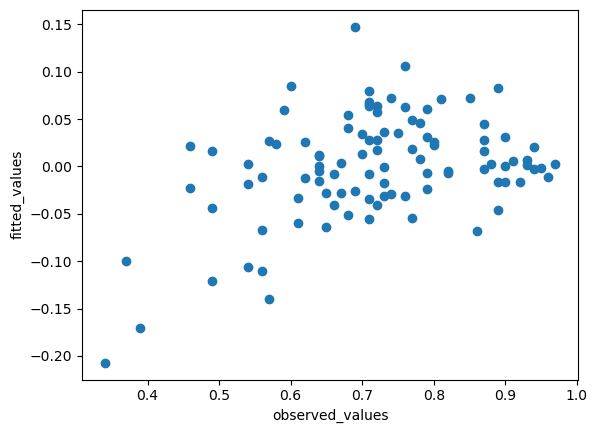

In [117]:
plt.scatter(y_train,test_res)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

# 2.Normality of Errors

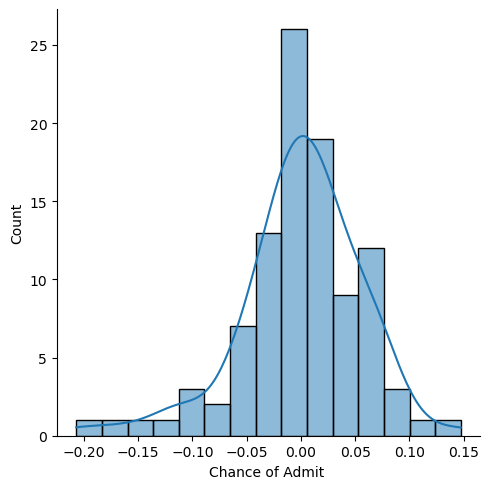

In [118]:
sns.displot(test_res,bins=15,kde=True)
plt.show()

# 3.Equal Variance of Errors (Homoscadesicity)

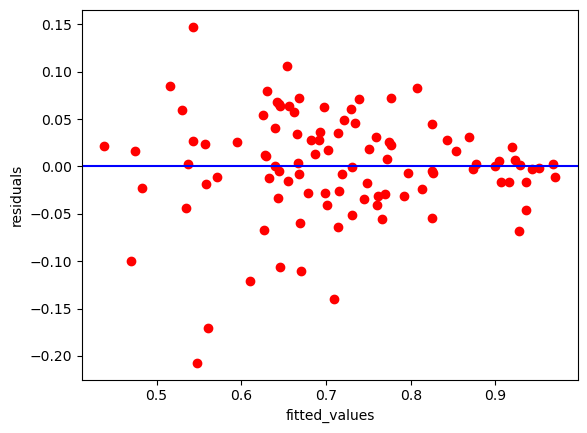

In [119]:
plt.scatter(train_predictions,test_res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel('fitted_values')
plt.ylabel('residuals')
plt.show()

# 4.Variables Significance
Hypothesis Testing for variables

Null hypothesis: There is no relationship between input variable and output variable.

Alternative hypothesis: There is a relationship between input variable and output variable

In [120]:
import statsmodels.formula.api as smf
model1=smf.ols("y~x",data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          8.21e-180
Time:                        16:19:28   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2757      0.104    -12.232      0.000      -1.481      -1.071
x[0]           0.0019      0.001      3.700      0.000       0.001       0.003
x[1]           0.0028      0.001      3.184      0.002       0.001       0.004
x[2]           0.0059      0.004      1.563      0.119      -0.002       0.013
x[3]           0.0016      0.005      0.348      0.728      -0.007       0.011
x[4]           0.0169      0.004      4.074      0.000       0.009       0.025
x[5]           0.1184      0.010     12.198      0.000       0.099       0.137
x[6]           0.0243      0.007      3.680      0.000       0.011       0.037
==============================================================================
Omnibus:                      112.770   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.104
Skew:                          -1.160   Prob(JB):                     1.22e-57
Kurtosis:                       5.684   Cond. No.                     1.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Added variable plot(AV Plot)


Partial difference insted of normal differentiation

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


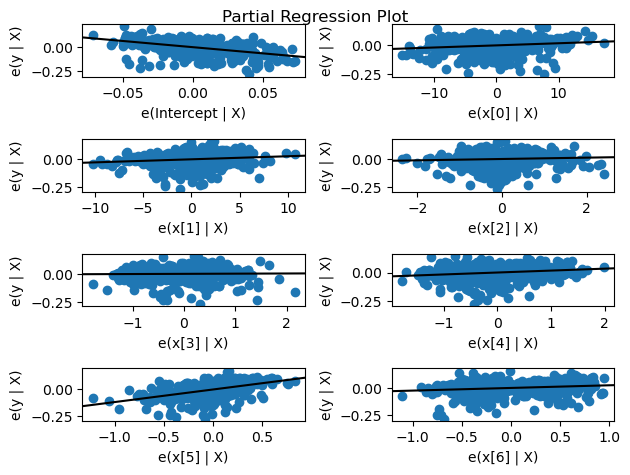

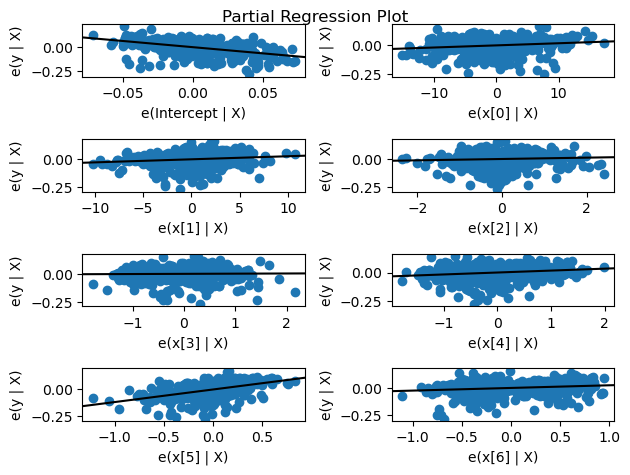

In [121]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)

# Remove S0P because p-value SOP as 0.7 more then 0.5 we have to do drop that column

In [122]:
df=df.drop(columns=["SOP"])
df

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit
0,0,1,337,118,4,4.5,9.65,1,0.92
1,1,2,324,107,4,4.5,8.87,1,0.76
2,2,3,316,104,3,3.5,8.00,1,0.72
3,3,4,322,110,3,2.5,8.67,1,0.80
4,4,5,314,103,2,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,495,496,332,108,5,4.0,9.02,1,0.87
496,496,497,337,117,5,5.0,9.87,1,0.96
497,497,498,330,120,5,5.0,9.56,1,0.93
498,498,499,312,103,4,5.0,8.43,0,0.73


In [123]:
df.columns

Index(['Unnamed: 0', 'Serial No.', 'GRE Score', 'TOEFL Score',
       'University Rating', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

# Final model including

In [124]:
x=df[['GRE Score', 'TOEFL Score', 'University Rating', 'LOR ', 'CGPA','Research']]
y=df['Chance of Admit ']

from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=8)

from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
print("coefficient",model.coef_)
print("intercept",model.intercept_)

train_predictions=model.predict(x_train)
print("Train R2",model.score(x_train,y_train))
print("Test R2",model.score(x_test,y_test))

print("Cross validation Score:", cross_val_score(model,x,y, cv=5).mean())



coefficient [0.00191578 0.00319632 0.00524222 0.01588621 0.11927228 0.02528497]
intercept -1.3367969836294382
Train R2 0.8292743579706157
Test R2 0.787330602020721
Cross validation Score: 0.8137472528076823


# Variance Inflation Factor(VIF)

VIF measures the ratio between the variance for a given regression coefficient with only that variable in the model versus the variance for a given regression coefficient with all variables in the model.

In [125]:
df[['GRE Score', 'TOEFL Score', 'University Rating', 'LOR ', 'CGPA','Research']].corr()

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
GRE Score,1.000000,0.827200,0.635376,0.524679,0.825878,0.563398
TOEFL Score,0.827200,1.000000,0.649799,0.541563,0.810574,0.467012
University Rating,0.635376,0.649799,1.000000,0.608651,0.705254,0.427047
LOR,0.524679,0.541563,0.608651,1.000000,0.637469,0.372526
CGPA,0.825878,0.810574,0.705254,0.637469,1.000000,0.501311
Research,0.563398,0.467012,0.427047,0.372526,0.501311,1.000000


In [126]:
# calculating VIF's values of independent variables

rsq_GRE Score = smf.ols('GRE Score~TOEFL Score+University Rating+SOP+CGPA+Research',data=df).fit().rsquared

vif_GRE Score = 1/(1-rsq_GRE Score)

rsq_TOEFL Score = smf.ols("TOEFL Score~GRE Score + University Rating + SOP + CGPA+ Research",data=df).fit().rsquared
vif_TOEFL Score= 1/(1-rsq_TOEFL Score)

rsq_University Rating = smf.ols("University Rating~GRE Score+ TOEFL Score + SOP+ CGPA+ Research",data=df).fit().rsquared
vif_University Rating = 1/(1-rsq_University Rating)

rsq_SOP = smf.ols("SOP~ GRE Score+ TOEFL Score+University Rating + CGPA+ Research",data=df).fit().rsquared
vif_SOP = 1/(1-rsq_SOP)

rsq_LOR = smf.ols("LOR~ GRE Score+ TOEFL Score+University Rating +SOP+ CGPA+ Research",data=df).fit().rsquared
vif_LOR= 1/(1-rsq_LOR)

rsq_CGPA = smf.ols("CGPA~ GRE Score+TOEFL Score+University Rating + SOP + Research",data=df).fit().rsquared
vif_CGPA= 1/(1-rsq_CGPA)

rsq_Research = smf.ols("Research~ GRE Score+TOEFL Score+University Rating + SOP + CGPA",data=df).fit().rsquared
vif_Research = 1/(1-rsq_Research)

# Staring vif values in a data frame

d1={'Variables':['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
    'CGPA', 'Research'],'VIF':[vif_GRE Score,vif_TOEFL Score,vif_University Rating,vif_SOP,vif_CGPA,vif_Research]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

SyntaxError: invalid syntax (1761962957.py, line 3)

In [127]:
# vif not coming the output i will do vif again 